Note to self: float32 is NOT enough to achieve reasonable numerical stability in the Gram-Schmidt step!

In [16]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv('er_graphs_scaling_out.csv')

In [19]:
df.iloc[0]

graph_id                                                          0
edge_index        [[2, 2, 3, 7, 1, 1, 5, 4, 2, 5, 2], [7, 6, 5, ...
num_nodes                                                        10
signals           [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1, -1, 1, 1...
partition_time                                              8167919
extract_time                                                 187364
Name: 0, dtype: object

In [20]:
dat = []
for row in df.itertuples():
    n = row.num_nodes
    m = len(eval(row.edge_index)[0])
    part = row.partition_time
    ext = row.extract_time
    dat.append((n, m, part, ext))

In [21]:
dat.sort()

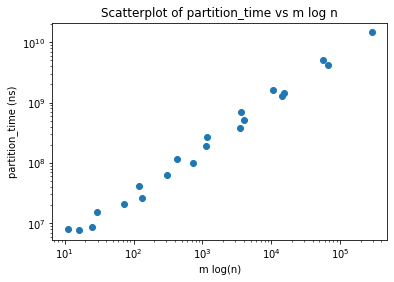

In [23]:
plt.scatter([x[1]*np.log10(x[0]) for x in dat], [x[2] for x in dat])
plt.xlabel('m log(n)')
plt.ylabel('partition_time (ns)')
plt.title('Scatterplot of partition_time vs m log n')
plt.xscale('log')
plt.yscale('log')
plt.show()

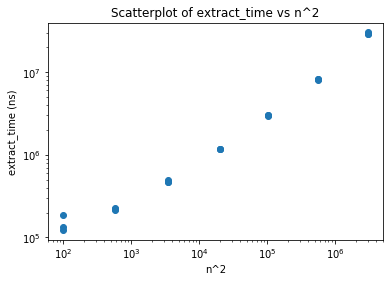

In [ ]:
plt.scatter([x[0]**2 for x in dat], [x[3] for x in dat])
plt.xlabel('n^2')
plt.ylabel('extract_time (ns)')
plt.title('Scatterplot of extract_time vs n^2')
plt.xscale('log')
plt.yscale('log')
plt.show()